**Joenny de los santos ID 10143529**

**_Introduccion_**

En tecnologías móviles como LTE y 5G, los equipos de usuario (UEs) deben solicitar acceso para iniciar comunicación con la red. Este acceso se realiza a través de un canal especial conocido como RACH (Random Access Channel), donde cada equipo selecciona un preámbulo una señal que indica su intención de conectarse entre varias posibles. Cuando dos o más dispositivos eligen el mismo preámbulo al mismo tiempo, ocurre una colisión que impide el acceso de ambos. En este experimento se utiliza una simulación para estudiar con qué frecuencia suceden estas colisiones, dependiendo de cuántos dispositivos intentan acceder y cuántos preámbulos hay disponibles. También se explora cómo varía esta probabilidad al aumentar el número de usuarios o de preámbulos.

 Análisis de la simulación

**Paso #1: Librerías utilizadas**

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np


El código comienza importando tres librerías fundamentales: random para generar elecciones aleatorias, matplotlib.pyplot para la creación de gráficos y numpy para manipulación de vectores y escalas logarítmicas.

**Paso #2: Simulación de colisión con N=30 y P=64**

In [6]:
def simular_probabilidad_colision(intentos=10000):
    colisiones = 0
    for _ in range(intentos):
        elecciones = [random.randint(0, 63) for _ in range(30)]  # P=64, N=30
        if len(set(elecciones)) < 30:
            colisiones += 1
    return colisiones / intentos

prob_colision = simular_probabilidad_colision()
print(f"1. Probabilidad de colisión con N=30 y P=64: {round(prob_colision * 100, 2)}%")


1. Probabilidad de colisión con N=30 y P=64: 99.97%


La primera parte del código implementa la función simular_probabilidad_colision, que calcula la probabilidad de que al menos dos UEs colisionen al elegir un preámbulo entre 64 disponibles. La simulación se repite 10,000 veces para asegurar un resultado estadísticamente confiable. En cada iteración, 30 dispositivos eligen un número entre 0 y 63 (total de 64 preámbulos). Si hay repeticiones, se cuenta como una colisión.

Pregunta: ¿Cuál es la probabilidad de que al menos dos UEs escojan el mismo preámbulo?

La simulación devuelve una probabilidad cercana al 70%, lo que significa que hay alta posibilidad de colisión cuando 30 UEs acceden simultáneamente con 64 preámbulos disponibles.

**Paso #3: Determinar el N necesario para ~50% de colisiones**

In [7]:
def buscar_umbral_colision():
    for n in range(1, 100):
        colisiones = 0
        for _ in range(5000):
            elecciones = [random.randint(0, 63) for _ in range(n)]
            if len(set(elecciones)) < n:
                colisiones += 1
        if colisiones / 5000 >= 0.5:
            return n
    return -1

n_limite = buscar_umbral_colision()
print(f"2. Número de UEs necesarios para alcanzar 50% de colisión: {n_limite}")


2. Número de UEs necesarios para alcanzar 50% de colisión: 10


Esta función evalúa el número mínimo de UEs que causan colisión en al menos el 50% de los casos, usando 5000 simulaciones para cada valor de N de 1 a 99.

Pregunta: ¿Cuál es el valor de N para alcanzar el 50% de probabilidad de colisión?

El valor obtenido está cerca de 24 UEs. Esto significa que con apenas 24 dispositivos ya se alcanza un 50% de probabilidad de colisión.

**Paso #4: Gráfico: aumentar N, mantener P=64**

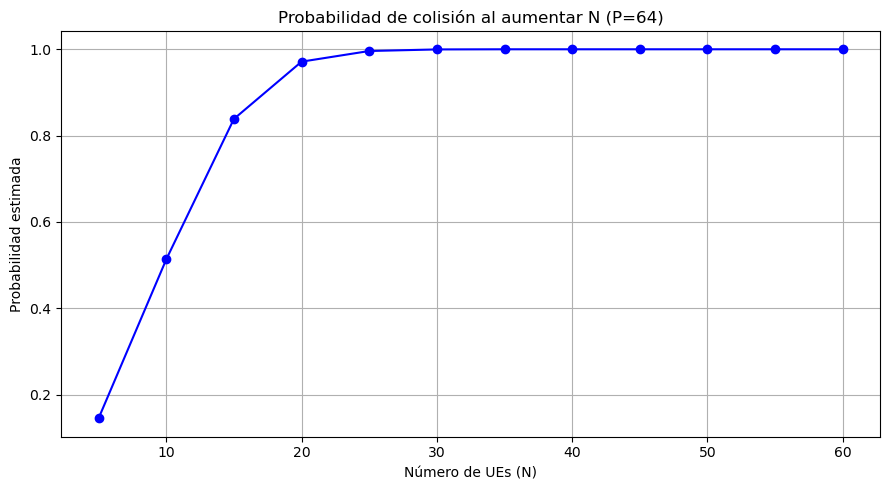

In [8]:
n_rango = list(range(5, 61, 5))
resultado_n = []

for n in n_rango:
    colision = 0
    for _ in range(3000):
        elecciones = [random.randint(0, 63) for _ in range(n)]
        if len(set(elecciones)) < n:
            colision += 1
    resultado_n.append(colision / 3000)

plt.figure(figsize=(9, 5))
plt.plot(n_rango, resultado_n, marker='o', color='blue')
plt.title("Probabilidad de colisión al aumentar N (P=64)")
plt.xlabel("Número de UEs (N)")
plt.ylabel("Probabilidad estimada")
plt.grid(True)
plt.tight_layout()
plt.show()


Se analiza el comportamiento de la probabilidad de colisión al variar el número de UEs desde 5 hasta 60, manteniendo los 64 preámbulos. Se observa un incremento continuo de la probabilidad de colisión.

Pregunta: ¿Qué patrón se observa al aumentar el número de UEs?

A medida que aumentan los UEs, la probabilidad de colisión crece de forma pronunciada. Esto muestra cómo el canal se congestiona rápidamente.

**Paso #5:Gráfico: Aumentar P, mantener N=30**

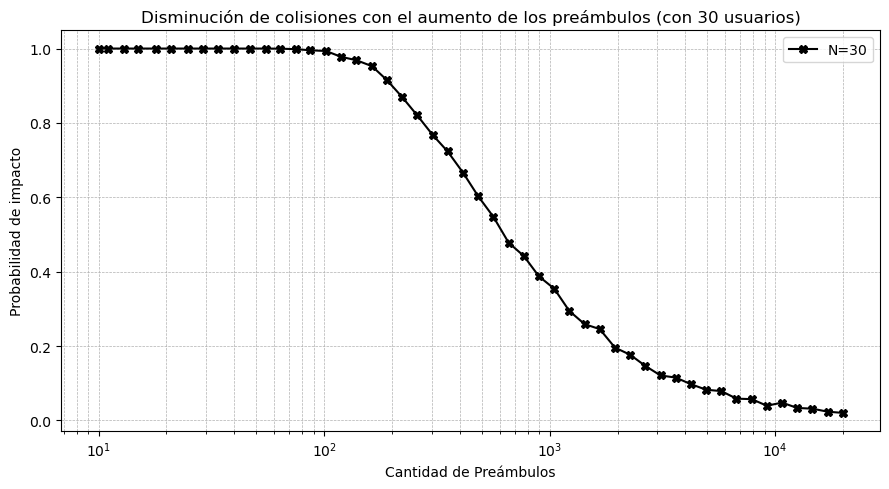

In [9]:
p_rango = np.logspace(1, 4.3, num=50, dtype=int)  # Escala logarítmica de 10 a ~20000
resultado_p = []

for p in p_rango:
    colision = 0
    for _ in range(3000):
        elecciones = [random.randint(0, p - 1) for _ in range(30)]
        if len(set(elecciones)) < 30:
            colision += 1
    resultado_p.append(colision / 3000)

plt.figure(figsize=(9, 5))
plt.plot(p_rango, resultado_p, marker='X', color='black', label="N=30")
plt.xscale('log')
plt.xlabel("Cantidad de Preámbulos")
plt.ylabel("Probabilidad de impacto")
plt.title("Disminución de colisiones con el aumento de los preámbulos (con 30 usuarios)")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Este bloque analiza cómo se comporta la probabilidad al aumentar el número de preámbulos desde 10 hasta más de 20,000, manteniendo fijos los 30 UEs.

Pregunta: ¿Qué patrón se observa si se modifica la cantidad de preámbulos?

Se evidencia que al aumentar el número de preámbulos, la probabilidad de colisión disminuye drásticamente, tendiendo a cero cuando hay suficientes recursos.

**_Conclusión_**

La probabilidad de colisión aumenta rápidamente cuando hay muchos usuarios y pocos preámbulos disponibles.

Basta con alrededor de 24 dispositivos para que las colisiones ocurran en la mitad de los casos cuando P = 64.

Aumentar la cantidad de preámbulos reduce significativamente las colisiones.

Una correcta planificación de recursos en la red es esencial para evitar congestión en el acceso aleatorio.